In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

In [2]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  MODData_Pandas28022025A.csv


Month     OB (Bcm)   Coal (Ton)  Distance OB (KM)  Distance Coal (KM)  \
0   Jan-23  17384635.26  1168560.890          4.049147           13.133206   
1   Feb-23  15768223.79  1167988.800          4.001956           13.356853   
2   Mar-23  19750434.03  1374953.690          3.647640           13.541760   
3   Apr-23  17571138.89  1394514.550          3.527485           12.664754   
4   May-23  18533067.06  1573064.010          3.879662           11.887406   
5   Jun-23  18649038.45  1563274.160          3.722715           10.891598   
6   Jul-23  20742898.38  1683865.840          3.827571           12.961600   
7   Aug-23  23445864.03  1764668.400          3.731248           13.410723   
8   Sep-23  21119800.96  1754962.710          3.829266           12.107981   
9   Oct-23  22294833.78  2017816.930          4.198328           11.989467   
10  Nov-23  20776000.54  1761585.720          4.067368           11.922033   
11  Dec-23  18888171.55  1274742.720          4.274602           12.542361   
12  Jan-24  18764364.43  1794218.293          4.187585           13.548091   
13  Feb-24  17758063.49  1453870.841          4.367931           14.075196   
14  Mar-24  19184562.84  1560546.053          4.440032           14.695756   
15  Apr-24  18390434.76  1655073.208          4.231824           14.076420   
16  May-24  18832875.87  1715743.806          4.361405           14.196265   
17  Jun-24  15216375.49  1759282.919          4.934114           11.372917   
18  Jul-24  15124626.70  1684983.779          5.140219           11.438191   
19  Aug-24  17004298.81  1849275.791          4.621782           12.590544   
20  Sep-24  17225304.60  1727929.387          4.772162           13.591599   
21  Oct-24  16503268.26  1752797.375          4.588764           12.154111   
22  Nov-24  15398246.98  1518041.534          4.794843           13.764489   
23  Dec-24  15378584.85  1128237.018          4.651142           13.724745   
24  Jan-25  13918891.69  1385756.390          4.757000           14.770000   

        Fuel  
0   30019859  
1   28741904  
2   33406642  
3   28702688  
4   32465717  
5   31244147  
6   33571132  
7   35625395  
8   33384423  
9   36447204  
10  33659338  
11  32589701  
12  31819804  
13  30686841  
14  32037039  
15  29999319  
16  32426842  
17  28621380  
18  30681119  
19  30989378  
20  31851080  
21  31127444  
22  30675035  
23  30883432  
24  27564154

---
### Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

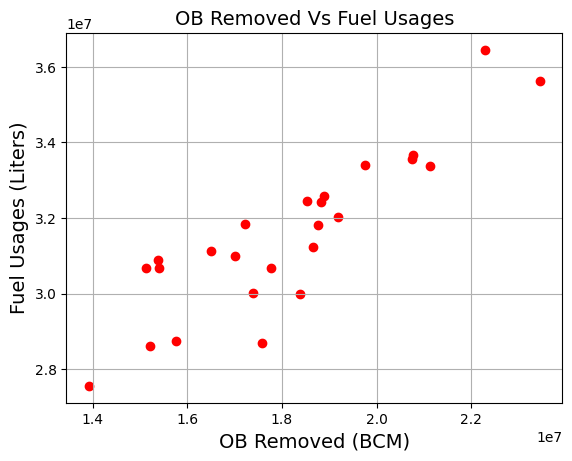

In [3]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

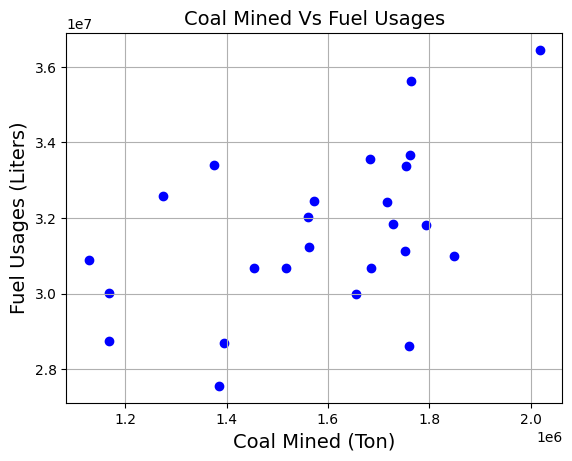

In [4]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

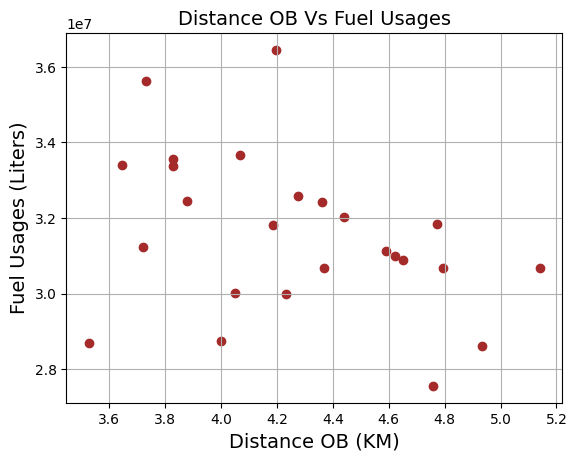

In [5]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

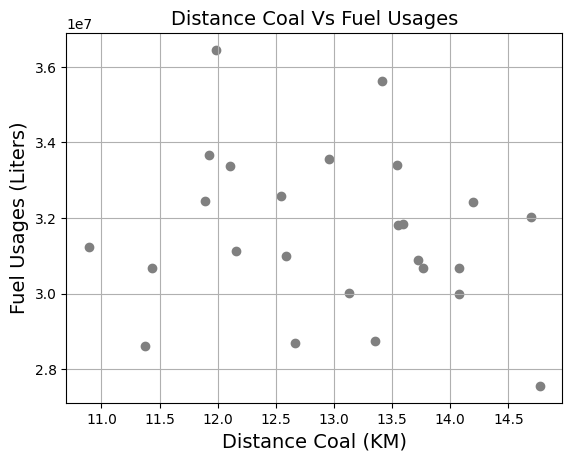

In [6]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

From Linearity test above we found that OB Removed, and OB Distance have linier relantionship with Fuel Usages

In [7]:
dataset = dataset.drop(['Month'], axis=1)

In [8]:
correlations = dataset.corr()
correlations['Fuel']

OB (Bcm)              0.879194
Coal (Ton)            0.499107
Distance OB (KM)     -0.369075
Distance Coal (KM)   -0.171315
Fuel                  1.000000
Name: Fuel, dtype: float64

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import seaborn as sns

In [10]:
x = dataset[['OB (Bcm)','Coal (Ton)']]
y = dataset['Fuel']
 
# Split dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
# ==============================
# Linear Regression (sklearn)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [13]:
# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation (5-fold)
cv_scores = cross_val_score(regr, X_train, y_train, cv=3, scoring='r2')

# Print Results
print("\n📌 Model Performance Metrics:")
print(f"Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
print(f"Train R² Score: {train_r2:.3f} | Test R² Score: {test_r2:.3f}")

print("\n📌 Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores.round(3)}")
print(f"Mean R² Score: {cv_scores.mean():.3f} | Std Dev: {cv_scores.std():.3f}")


📌 Model Performance Metrics:
Train MSE: 880970999549.277 | Test MSE: 1154079637931.930
Train MAE: 739664.557 | Test MAE: 745129.842
Train R² Score: 0.775 | Test R² Score: 0.767

📌 Cross-Validation Results:
R² Scores for each fold: [0.115 0.673 0.979]
Mean R² Score: 0.589 | Std Dev: 0.358


In [14]:
# ==============================
# Linear Regression (statsmodels)
# ==============================
X_const = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X_const).fit()
print("\n📌 Statsmodels Regression Summary:")
print(model.summary())


📌 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     41.13
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           3.69e-08
Time:                        23:34:41   Log-Likelihood:                -379.65
No. Observations:                  25   AIC:                             765.3
Df Residuals:                      22   BIC:                             769.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.635

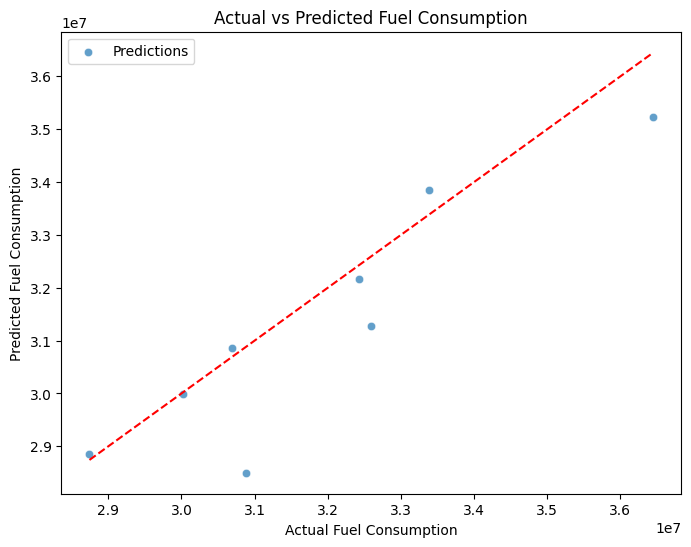

In [15]:
# ==============================
# Plot: Actual vs Predicted
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.legend()
plt.show()

In [16]:
# Model Intercept
print(f"Intercept: {regr.intercept_:.3f}")

# Model Coefficients
coef_dict = dict(zip(x.columns, regr.coef_))  # Match feature names to coefficients
print("Coefficients:")
for feature, coef in coef_dict.items():
    print(f"  {feature}: {coef:.3f}")

Intercept: 15324362.251
Coefficients:
  OB (Bcm): 0.703
  Coal (Ton): 2.096


In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 3 most relevant features
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(x, y)

# Print selected feature names (use 'x' instead of 'X')
selected_features = x.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['OB (Bcm)', 'Coal (Ton)']
